<a href="https://colab.research.google.com/github/KCY132/HW/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, MSE: 1.4356, MAPE: 959.78%
Epoch 2, MSE: 1.3955, MAPE: 943.63%
Epoch 3, MSE: 1.3601, MAPE: 928.50%
Epoch 4, MSE: 1.3288, MAPE: 914.32%
Epoch 5, MSE: 1.3012, MAPE: 901.01%
Epoch 6, MSE: 1.2767, MAPE: 888.52%
Epoch 7, MSE: 1.2550, MAPE: 876.80%
Epoch 8, MSE: 1.2359, MAPE: 865.80%
Epoch 9, MSE: 1.2189, MAPE: 855.46%
Epoch 10, MSE: 1.2038, MAPE: 845.75%
Epoch 11, MSE: 1.1905, MAPE: 836.64%
Epoch 12, MSE: 1.1786, MAPE: 828.09%
Epoch 13, MSE: 1.1681, MAPE: 820.05%
Epoch 14, MSE: 1.1588, MAPE: 812.50%
Epoch 15, MSE: 1.1505, MAPE: 805.40%
Epoch 16, MSE: 1.1431, MAPE: 798.74%
Epoch 17, MSE: 1.1365, MAPE: 792.47%
Epoch 18, MSE: 1.1307, MAPE: 786.58%
Epoch 19, MSE: 1.1255, MAPE: 781.04%
Epoch 20, MSE: 1.1208, MAPE: 775.83%
Epoch 21, MSE: 1.1166, MAPE: 770.93%
Epoch 22, MSE: 1.1129, MAPE: 766.32%
Epoch 23, MSE: 1.1096, MAPE: 761.98%
Epoch 24, MSE: 1.1066, MAPE: 757.90%
Epoch 25, MSE: 1.1039, MAPE: 754.05%
Epoch 26, MSE: 1.1014, MAPE: 750.43%
Epoch 27, MSE: 1.0992, MAPE: 747.02%
Epoch 28, 

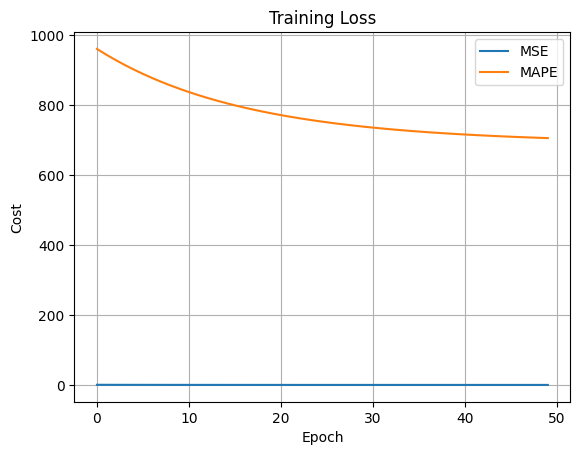

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 시그모이드 정의 ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# --- 손실 함수 정의 ---
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# --- 데이터 생성 ---
np.random.seed(0)
samples = 1000
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)
X = np.column_stack((x1, x2))
y = 2 * x1 + 3 * x2 - 1
y = y.reshape(-1, 1)

# --- 입력에 bias 추가 ---
Xb = np.hstack([np.ones((samples, 1)), X])  # shape: (1000, 3)

# --- 네트워크 초기 가중치 설정 ---
np.random.seed(0)
w_hidden = np.random.randn(3, 3)  # (입력 3, 은닉노드 3)
w_output = np.random.randn(4, 1)  # (은닉노드 3 + bias, 출력 1)

# --- 학습 설정 ---
lr = 0.01
epochs = 50

mse_list = []
mape_list = []

for epoch in range(epochs):
    ## --- 순전파 ---
    z_hidden = Xb @ w_hidden       # (1000,3)
    a_hidden = sigmoid(z_hidden)   # (1000,3)

    # 은닉 출력에 bias 추가
    a_hidden_b = np.hstack([np.ones((samples, 1)), a_hidden])  # (1000,4)

    z_output = a_hidden_b @ w_output  # (1000,1)
    y_pred = z_output                 # 선형 출력

    ## --- 손실 계산 ---
    loss_mse = mse(y, y_pred)
    loss_mape = mape(y, y_pred)
    mse_list.append(loss_mse)
    mape_list.append(loss_mape)

    ## --- 역전파 ---
    dL_dy = 2 * (y_pred - y) / samples            # (1000,1)
    dL_dw_output = a_hidden_b.T @ dL_dy           # (4,1)

    # 은닉층 역전파
    d_hidden = dL_dy @ w_output[1:].T * sigmoid_deriv(z_hidden)  # (1000,3)
    dL_dw_hidden = Xb.T @ d_hidden                # (3,3)

    # 가중치 업데이트
    w_output -= lr * dL_dw_output
    w_hidden -= lr * dL_dw_hidden

    print(f"Epoch {epoch+1}, MSE: {loss_mse:.4f}, MAPE: {loss_mape:.2f}%")

# --- 시각화 ---
plt.plot(mse_list, label='MSE')
plt.plot(mape_list, label='MAPE')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Loss")
plt.legend()
plt.grid(True)
plt.show()
